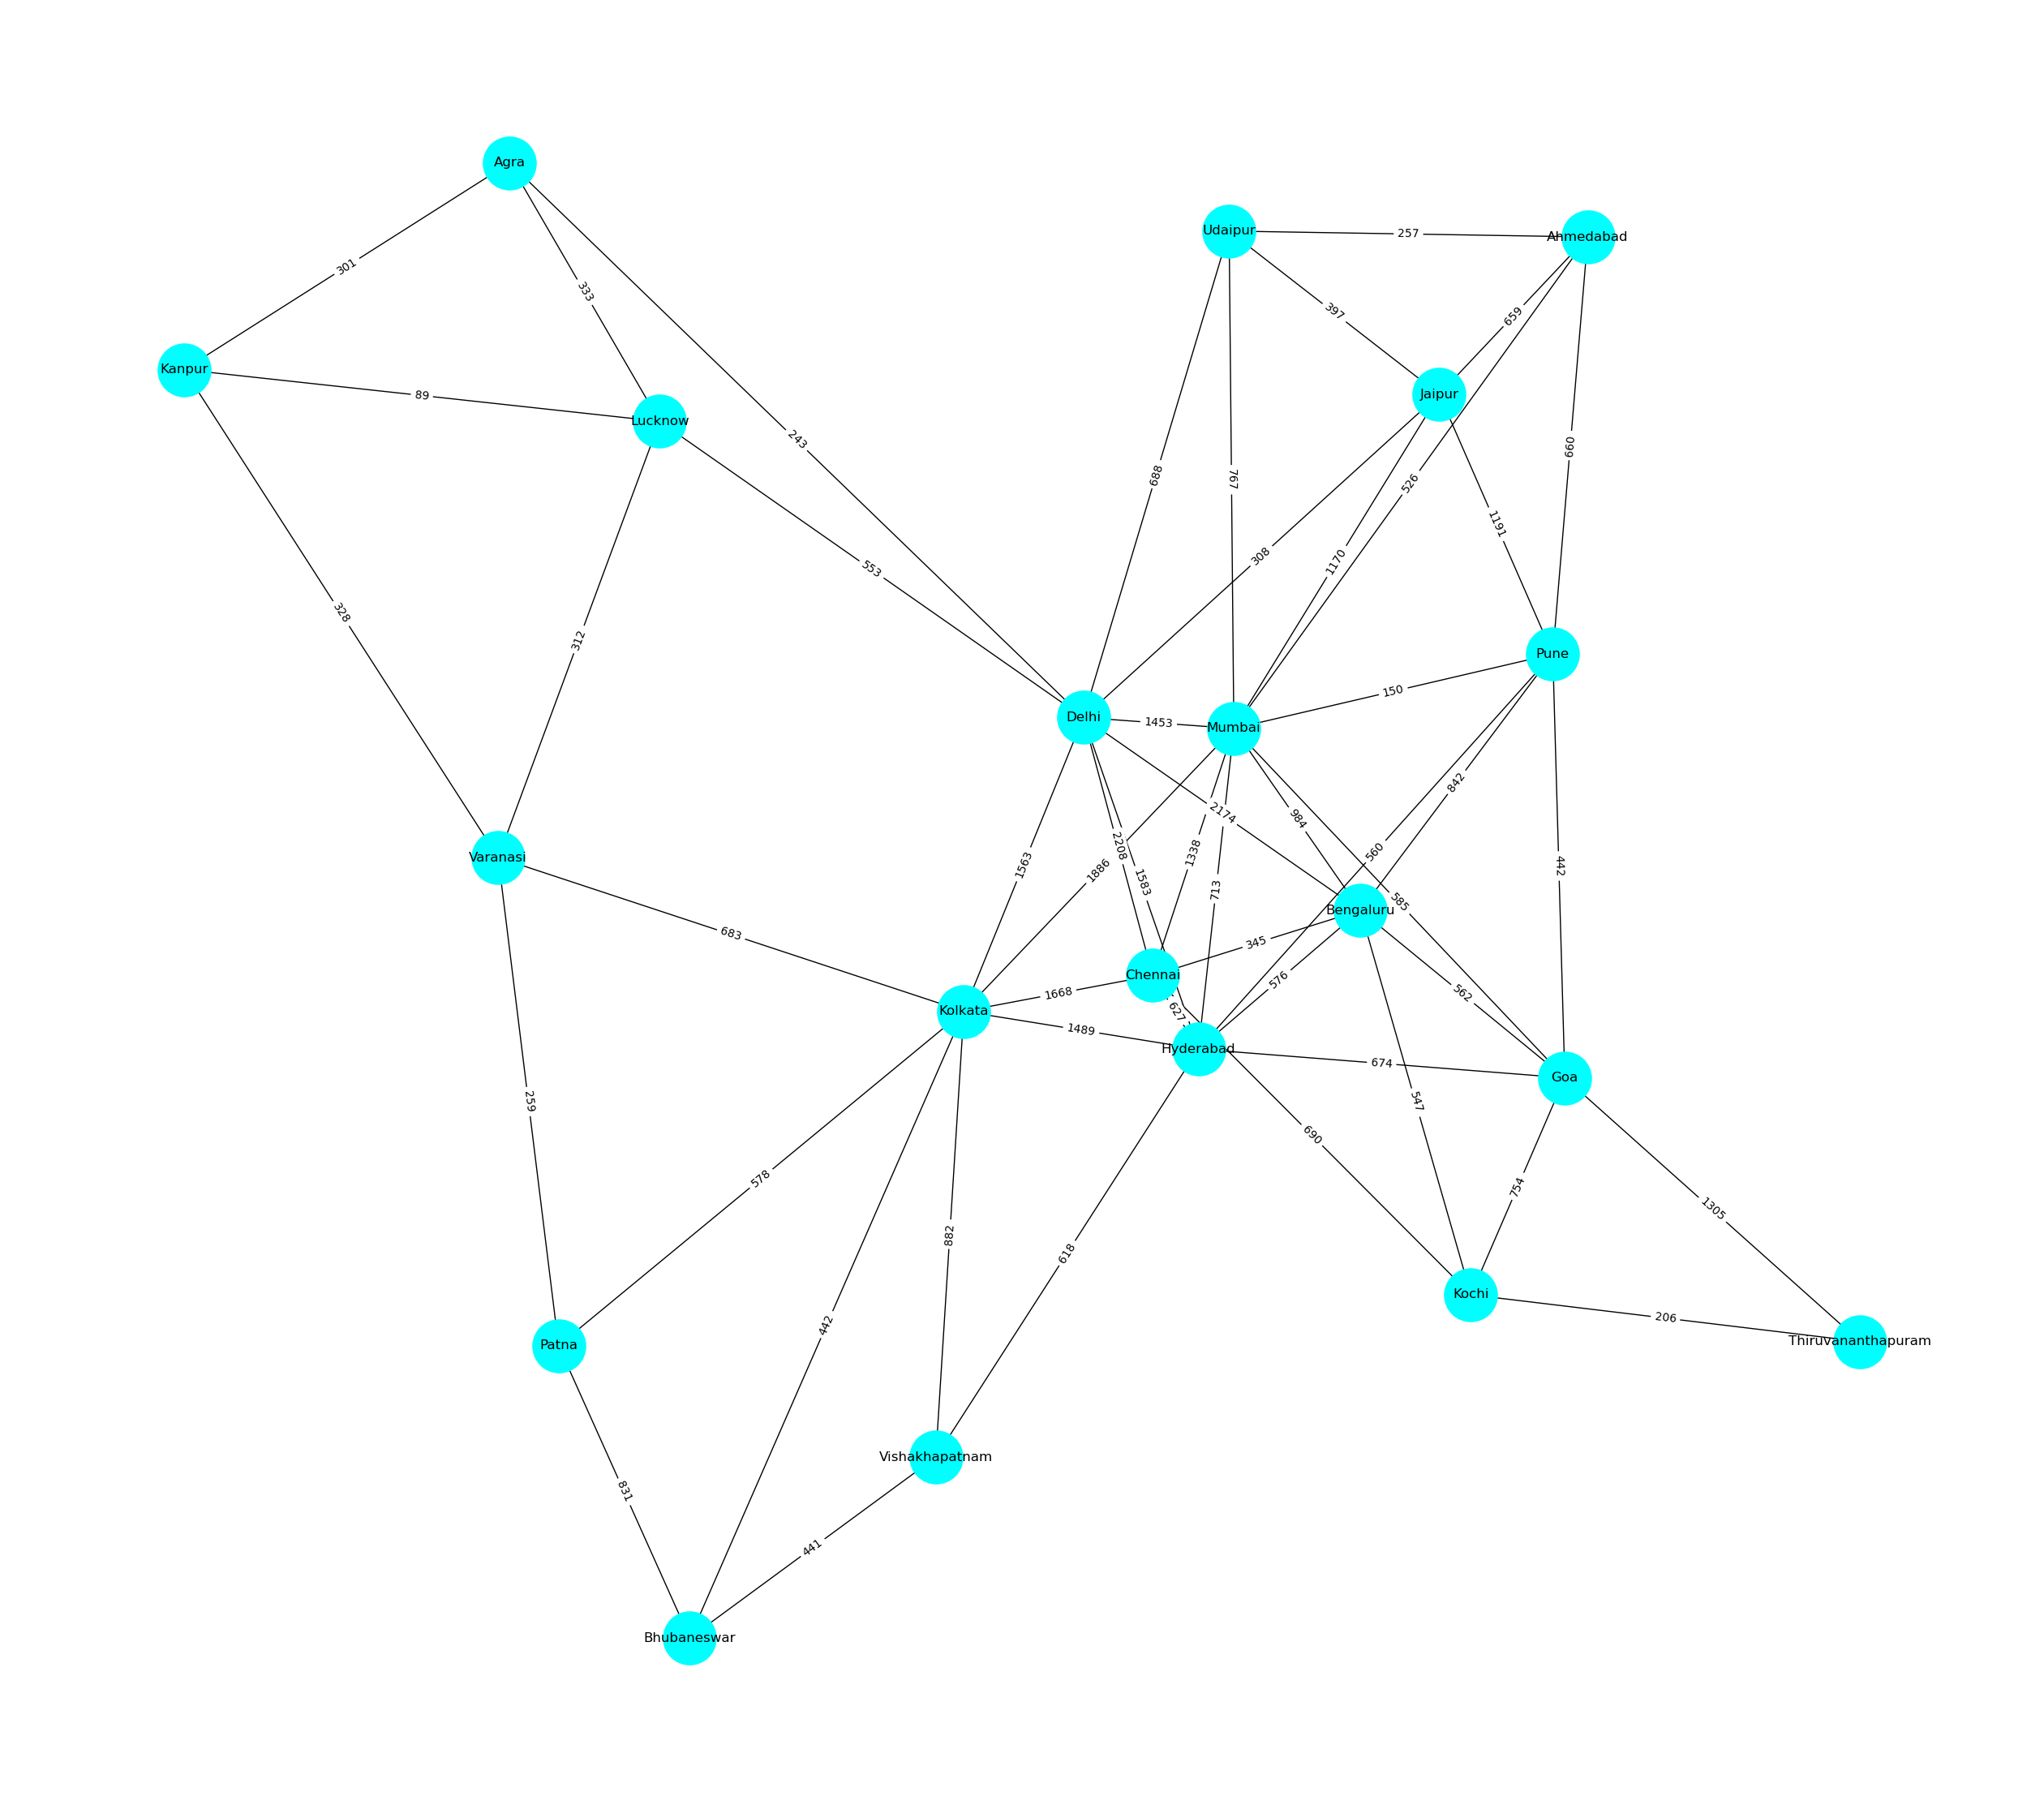

n Path from Patna to Agra is:  Patna -> Varanasi -> Lucknow -> Kanpur -> Agra 



In [1]:
import networkx as nx
import queue
import pandas as pd
import matplotlib.pyplot as plt
import math

                                                        # FUNCTIONS

def eculidian(node,goal,pos):
    x1,y1 = pos[node]
    x2,y2 = pos[goal]
    return math.sqrt((x2-x1)**2 + (y2-y1)**2)

def A_star(G,start,goal,heuristic):
    priorQueue = queue.PriorityQueue()
    priorQueue.put((0 + heuristic[start],[start]))

    while not priorQueue.empty():
        heuristic_val, path = priorQueue.get()
        node = path[-1]

        if(node == goal):
            return path

        visited.add(node)
 
        for i in G.neighbors(node):
            if i not in visited:
                weight = G[node][i]['weight']
                new_path = path + [i]                
                priorQueue.put((heuristic[i] + weight,new_path))
    return []

                                                        # MAIN FUNCTION

data = pd.read_csv("indian-cities-dataset.csv")
visited = set()
heuristic = {}
stack = []

origin = list(data["Origin"])
destination = list(data["Destination"])
distance = list(data["Distance"])

G = nx.Graph()
edges = zip(origin,destination,distance)

G.add_weighted_edges_from(edges)
pos = nx.spring_layout(G, seed=50)

# Draw the graph

plt.figure(figsize=(25, 22))
nx.draw(G,pos,with_labels = True,node_size = 2200,node_color = "cyan")
nx.draw_networkx_edge_labels(G, pos,edge_labels=nx.get_edge_attributes(G, 'weight'))
plt.show()

start = input("Enter the start: ")
goal = input("Enter the goal: ")
start = start.capitalize()
goal = goal.capitalize()

for node in G.nodes:
    heuristic[node] = eculidian(node,goal,pos)

path = A_star(G,start,goal,heuristic)
if path:
    print("n Path from {} to {} is:  {} \n".format(start,goal,' -> '.join(path)))